<a href="https://colab.research.google.com/github/als9566/2020-2-AI/blob/master/code/02_tf_interm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#텐서플로

In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [ ]:
# 텐서플로 2.0에서 즉시 실행은 기본으로 활성화
tf.executing_eagerly()

True

In [ ]:
a = tf.constant([[1,2],
                 [3,4]])
print(a)
print(a.numpy())

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
[[1 2]
 [3 4]]


# 2차원 행렬 곱셉

In [ ]:
x = [[2.]]
m = tf.matmul(x, x)
print(m)
print(m.numpy())

tf.Tensor([[4.]], shape=(1, 1), dtype=float32)
[[4.]]


In [ ]:
# Matrix multiplications 1
matrix1 = tf.constant([[1.,2.],[3.,4.]])
matrix2 = tf.constant([[2.,0.],[1.,2.]])

gop = tf.matmul(matrix1, matrix2)
print(gop.numpy())

[[ 4.  4.]
 [10.  8.]]


In [ ]:
# Matrix multiplication 2
gop =tf.matmul(matrix2, matrix1)
print(gop.numpy())

[[ 2.  4.]
 [ 7. 10.]]


In [ ]:
x = tf.constant([[0],[10],[20],[30]])
y = tf.constant([0,1,2])

print((x+y).numpy())

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


# 브로드캐스팅

In [ ]:
# 브로드캐스팅(Broadcasting) 지원
a = tf.constant([[1,2],
                 [3,4]])
b = tf.add(a, 1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [ ]:
x = tf.constant([[0], [10],[20],[30]])
y = tf.constant([0,1,2])

print((x+y).numpy())

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [ ]:
import numpy as np

print(np.arange(3))
print(np.ones((3,3)))
print()

x = tf.constant((np.arange(3)))
y = tf.constant([5], dtype=tf.int64)
print(x)
print(y)
print(x+y)

[0 1 2]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

tf.Tensor([0 1 2], shape=(3,), dtype=int64)
tf.Tensor([5], shape=(1,), dtype=int64)
tf.Tensor([5 6 7], shape=(3,), dtype=int64)


In [ ]:
x = tf.constant((np.arange(3)))
y = tf.constant([5], dtype=tf.int64)
print((x+y).numpy())

x = tf.constant((np.ones((3,3))))
y = tf.constant(np.arange(3), dtype=tf.double)
print((x+y).numpy())

x = tf.constant(np.arange(3).reshape(3,1))
y = tf.constant(np.arange(3))
print((x+y).numpy())

[5 6 7]
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


# 텐서플로 연산

In [ ]:
a = 2
b = 3
c = tf.add(a, b)
print(c.numpy())

5


In [ ]:
x = 2
y = 3
add_op = tf.add(x,y)
mul_op = tf.multiply(x,y)
pow_op = tf.pow(add_op,mul_op)

print(pow_op.numpy())

15625


In [ ]:
a = tf.constant(2.)
b = tf.constant(3.)
c = tf.constant(5.)

# Some more operations.
mean = tf.reduce_mean([a,b,c])
sum = tf.reduce_sum([a,b,c])

print("mean = ",mean.numpy())
print("sum = ",sum.numpy())

mean =  3.3333333
sum =  10.0


# 행렬,원소와의  곱

In [ ]:
# 연산자 오버로딩 지원
print(a)
# 텐서로부터 numpy 값 얻기 :
print(a.numpy())
print(b)
print(b.numpy())
print(a*b)

tf.Tensor(2.0, shape=(), dtype=float32)
2.0
tf.Tensor(3.0, shape=(), dtype=float32)
3.0
tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
# NumPy값 사용
import numpy as np

c = np.multiply(a,b)
print(c)

6.0


#rank

In [ ]:
my_image = tf.zeros([2,5,5,3])
my_image.shape

TensorShape([2, 5, 5, 3])

In [ ]:
tf.rank(my_image)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

#shape,reshape

In [ ]:
rank_three_tensor = tf.ones([3,4,5])
rank_three_tensor.shape

TensorShape([3, 4, 5])

In [ ]:
rank_three_tensor.numpy()

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]], dtype=float32)

In [ ]:
# 기존 내용을 6x10 행렬로 형태 변경
matrix = tf.reshape(rank_three_tensor, [6,10])
matrix

<tf.Tensor: shape=(6, 10), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
# 기존 내용을 3x20 행렬로 형태 변경
# -1은 차원 크기를 계산하여 자동으로 결정하라는 의미
matrixB = tf.reshape(matrix, [3,-1])
matrixB

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]], dtype=float32)>

In [ ]:
yet_another = tf.reshape(matrixAlt, [13,2,-1]) #에러!

NameError: ignored

#자료형과 변환

In [ ]:
float_tensor = tf.cast(tf.constant([1,2,3]),dtype=tf.float32)
float_tensor

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [ ]:
float_tensor.dtype

tf.float32

#변수 Variable

In [ ]:
v = tf.Variable(0.0)
v

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [ ]:
w = v+10
w

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [ ]:
w.numpy()

10.0

In [ ]:
v = tf.Variable(2.0)
v.assign_add(5)
v

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=7.0>

In [ ]:
v.read_value()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

(array([1016., 1016., 1048.,  967., 1017.,  977.,  995.,  964.,  983.,
        1017.]),
 array([4.2974949e-03, 5.0038137e+00, 1.0003329e+01, 1.5002846e+01,
        2.0002361e+01, 2.5001879e+01, 3.0001394e+01, 3.5000912e+01,
        4.0000427e+01, 4.4999943e+01, 4.9999458e+01], dtype=float32),
 <a list of 10 Patch objects>)

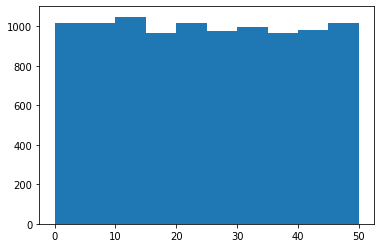

In [ ]:
import matplotlib.pyplot as plt
rand = tf.random.uniform([10000],0,50)
plt.hist(rand, bins=10)

In [ ]:
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([-1.0051858   1.2291456  -1.2532612  -0.24205218], shape=(4,), dtype=float32)


In [ ]:
rand = tf.random.normal([2,4],0,2)
print(rand)

tf.Tensor(
[[-3.981227    4.2785344   0.7773894   2.0672226 ]
 [-1.0487068  -0.29860651 -1.5202352   2.1976314 ]], shape=(2, 4), dtype=float32)


(array([ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  2.,
         0.,  2.,  0.,  4.,  4.,  3.,  9.,  5.,  8.,  2.,  8.,  5., 14.,
        11., 10., 11., 16., 14., 11., 15., 13., 19., 14., 15., 25., 19.,
        29., 29., 32., 29., 29., 33., 33., 30., 21., 32., 35., 21., 26.,
        23., 30., 21., 18., 21., 22., 19., 22., 19., 15., 10., 18., 11.,
        17., 12., 12.,  9.,  6.,  6.,  2., 10.,  6.,  5.,  4.,  1.,  3.,
         4.,  0.,  2.,  0.,  1.,  3.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-3.3093288 , -3.2392697 , -3.1692104 , -3.0991514 , -3.029092  ,
        -2.959033  , -2.8889737 , -2.8189147 , -2.7488556 , -2.6787963 ,
        -2.6087372 , -2.538678  , -2.4686189 , -2.3985596 , -2.3285005 ,
        -2.2584414 , -2.1883821 , -2.118323  , -2.0482638 , -1.9782047 ,
        -1.9081455 , -1.8380864 , -1.7680272 , -1.697968  , -1.6279088 ,
        -1.5578496 , -1.4877906 , -1.4177314 , -1.3476722 , -1.277613

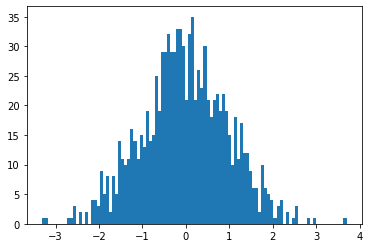

In [ ]:
import matplotlib.pyplot as plt
rand = tf.random.normal([1000],0,1)
plt.hist(rand, bins=100)

(array([  3.,   1.,   4.,   0.,   8.,   6.,  11.,   9.,  10.,  16.,  23.,
         47.,  49.,  56.,  71.,  71.,  90., 100.,  97., 106., 128., 115.,
        122., 109., 114.,  87.,  98.,  84.,  75.,  66.,  64.,  38.,  23.,
         26.,  25.,   9.,  10.,   9.,   5.,   6.,   3.,   2.,   0.,   0.,
          0.,   1.,   0.,   1.,   1.,   1.]),
 array([-3.1916938 , -3.0468128 , -2.9019318 , -2.7570505 , -2.6121695 ,
        -2.4672885 , -2.3224075 , -2.1775262 , -2.0326452 , -1.8877642 ,
        -1.7428831 , -1.5980021 , -1.453121  , -1.3082399 , -1.1633588 ,
        -1.0184778 , -0.8735967 , -0.72871566, -0.5838346 , -0.43895352,
        -0.29407245, -0.14919136, -0.0043103 ,  0.14057076,  0.28545183,
         0.4303329 ,  0.57521397,  0.72009504,  0.8649761 ,  1.0098572 ,
         1.1547382 ,  1.2996193 ,  1.4445003 ,  1.5893815 ,  1.7342625 ,
         1.8791436 ,  2.0240247 ,  2.1689057 ,  2.3137867 ,  2.4586678 ,
         2.603549  ,  2.74843   ,  2.893311  ,  3.038192  ,  3.1830733 ,
 

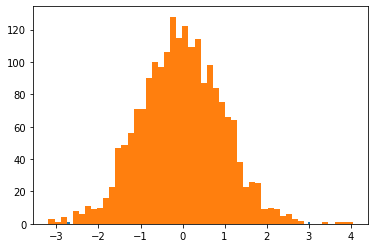

In [ ]:
import matplotlib.pyplot as plt
rand1 = tf.random.normal([1000],0,1)
rand2 = tf.random.normal([2000],0,1)
plt.hist(rand1,bins=100)
plt.hist(rand2,bins=50)

(array([ 1.,  2.,  0.,  2.,  0.,  1.,  1.,  1.,  3.,  2.,  1.,  3.,  7.,
         7.,  4.,  8.,  6.,  8., 10.,  9., 16., 14., 13., 20., 19., 24.,
        26., 16., 24., 27., 28., 34., 35., 36., 35., 36., 41., 40., 50.,
        40., 47., 58., 60., 45., 46., 53., 60., 62., 57., 53., 41., 55.,
        53., 48., 41., 49., 38., 33., 48., 41., 43., 30., 24., 26., 24.,
        23., 17., 18., 10., 16., 23., 15., 11.,  9.,  8.,  8.,  4.,  8.,
         6.,  7.,  4.,  2.,  5.,  4.,  3.,  1.,  4.,  1.,  1.,  0.,  1.,
         1.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-3.0960047 , -3.0297859 , -2.9635673 , -2.8973484 , -2.8311296 ,
        -2.764911  , -2.698692  , -2.6324732 , -2.5662546 , -2.5000358 ,
        -2.433817  , -2.3675983 , -2.3013794 , -2.2351606 , -2.1689417 ,
        -2.1027231 , -2.0365043 , -1.9702855 , -1.9040668 , -1.837848  ,
        -1.7716292 , -1.7054104 , -1.6391916 , -1.5729729 , -1.506754  ,
        -1.4405353 , -1.3743166 , -1.3080977 , -1.241879  , -1.175660

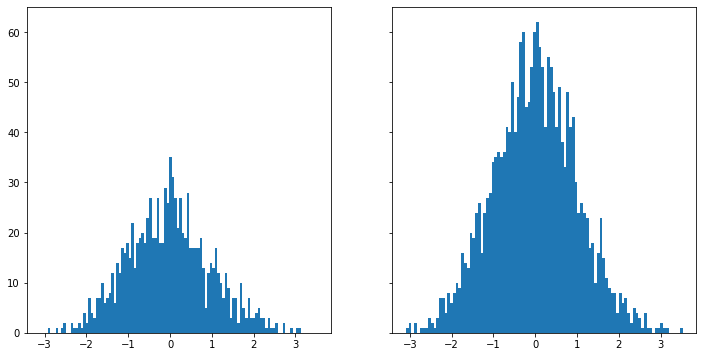

In [ ]:
import matplotlib.pyplot as plt
rand1 = tf.random.normal([1000],0,1)
rand2 = tf.random.normal([2000],0,1)

plt.rcParams["figure.figsize"] = (12,6)
fig, axes = plt.subplots(1,2,sharex=True, sharey=True)
axes[0].hist(rand1, bins=100)
axes[1].hist(rand2, bins=100)


In [ ]:
import numpy as np
a = np.arange(10)
print(a)
tf.random.shuffle(a)

[0 1 2 3 4 5 6 7 8 9]


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([7, 2, 5, 1, 9, 6, 8, 4, 3, 0])>

In [ ]:
import numpy as np
a = np.arange(20).reshape(4,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [ ]:
tf.random.shuffle(a)

<tf.Tensor: shape=(4, 5), dtype=int64, numpy=
array([[10, 11, 12, 13, 14],
       [ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [15, 16, 17, 18, 19]])>